In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile

# import preprocessed NBI2020 data
df = pd.read_csv('/content/NBI2020.txt',sep=',', header=0)
print(df.shape)
df


(309990, 16)


,STATE_CODE_001,AGE,OWNER_022,FUNCTIONAL_CLASS_026,ADT_029,DESIGN_LOAD_031,SERVICE_UND_042B,MAIN_UNIT_SPANS_045,APPR_SPANS_046,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,SUPERSTRUCTURE_COND_059,BRIDGE_CONDITION,YEAR_BUILT_027
0,200000,4.352941,2,2,-0.811639,0.166667,3,-1,0.147059,2.163636,1.308176,-2.823529,-2.80,4.0,P,1900.0
1,200000,4.352941,4,2,-1.018377,0.000000,3,0,0.000000,-1.054545,-0.748428,-2.411765,-2.25,4.0,P,1900.0
2,200000,-1.117647,2,2,-0.765697,0.666667,3,1,0.000000,-1.163636,-0.345912,-0.588235,-0.90,6.0,F,1993.0
3,200000,2.764706,2,2,-0.255743,0.166667,2,-1,0.088235,3.545455,2.377358,-1.411765,-1.15,7.0,G,1927.0
4,200000,4.352941,4,2,-0.283308,0.000000,2,1,0.058824,-0.654545,0.559748,-1.411765,-1.20,6.0,F,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309985,300000,0.529412,1,2,1.523737,0.666667,3,1,0.000000,-0.654545,-0.188679,0.058824,0.10,7.0,G,1965.0
309986,300000,0.823529,1,2,-0.733538,0.666667,3,2,0.000000,-0.781818,0.503145,0.470588,0.40,6.0,F,1960.0
309987,300000,0.823529,1,2,-0.733538,0.666667,3,2,0.000000,-0.654545,0.597484,0.352941,0.40,5.0,F,1960.0
309988,300000,0.823529,1,2,-0.733538,0.666667,3,1,0.000000,-1.218182,-0.534591,0.352941,0.40,5.0,F,1960.0


In [2]:
# encode four nominal variables with one_hot_code
# state_code_001, OWNER_022, FUNCTIONAL_CLASS_026, SERVICE_UND_042B
df_temp = pd.get_dummies(df, columns=['STATE_CODE_001','OWNER_022','FUNCTIONAL_CLASS_026','SERVICE_UND_042B'], 
                         prefix='one_hot_code', drop_first=True)

# rearrange columns
cols_at_end = ['BRIDGE_CONDITION', 'SUPERSTRUCTURE_COND_059', 'YEAR_BUILT_027']
df_temp = df_temp[[c for c in df_temp if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df_temp]]

# encode BRIDGE_CONDITION
"""
BRIDGE_CONDITION
using replace function to encode labels
'G, F, P' is encoded as '0, 1, 2'.
"""
df_temp = df_temp.replace({'BRIDGE_CONDITION': {'G':1, 
                                                'F':2,
                                                'P':3}})

df_temp

,AGE,ADT_029,DESIGN_LOAD_031,MAIN_UNIT_SPANS_045,APPR_SPANS_046,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,one_hot_code_200000,one_hot_code_300000,one_hot_code_400000,one_hot_code_2,one_hot_code_2,one_hot_code_2,one_hot_code_3,one_hot_code_3,one_hot_code_3,one_hot_code_4,one_hot_code_4,one_hot_code_4,one_hot_code_2,one_hot_code_2,one_hot_code_2,one_hot_code_3,one_hot_code_3,one_hot_code_3,one_hot_code_4,one_hot_code_4,one_hot_code_4,one_hot_code_2,one_hot_code_2,one_hot_code_2,one_hot_code_3,one_hot_code_3,one_hot_code_3,one_hot_code_4,one_hot_code_4,one_hot_code_4,BRIDGE_CONDITION,SUPERSTRUCTURE_COND_059,YEAR_BUILT_027
0,4.352941,-0.811639,0.166667,-1,0.147059,2.163636,1.308176,-2.823529,-2.80,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,3.0,4.0,1900.0
1,4.352941,-1.018377,0.000000,0,0.000000,-1.054545,-0.748428,-2.411765,-2.25,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,3.0,4.0,1900.0
2,-1.117647,-0.765697,0.666667,1,0.000000,-1.163636,-0.345912,-0.588235,-0.90,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,2.0,6.0,1993.0
3,2.764706,-0.255743,0.166667,-1,0.088235,3.545455,2.377358,-1.411765,-1.15,1,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1.0,7.0,1927.0
4,4.352941,-0.283308,0.000000,1,0.058824,-0.654545,0.559748,-1.411765,-1.20,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,2.0,6.0,1900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309985,0.529412,1.523737,0.666667,1,0.000000,-0.654545,-0.188679,0.058824,0.10,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1.0,7.0,1965.0
309986,0.823529,-0.733538,0.666667,2,0.000000,-0.781818,0.503145,0.470588,0.40,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,2.0,6.0,1960.0
309987,0.823529,-0.733538,0.666667,2,0.000000,-0.654545,0.597484,0.352941,0.40,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,2.0,5.0,1960.0
309988,0.823529,-0.733538,0.666667,1,0.000000,-1.218182,-0.534591,0.352941,0.40,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,2.0,5.0,1960.0


In [ ]:
# train-test split
x = df_temp.iloc[:, 0:39]
y = df_temp.iloc[:, 39]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)

# feature scaling has finished in Matlab



In [ ]:
# KNN training and prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18038  7777    84]
 [ 9399 21949   518]
 [  580  3603   444]]
              precision    recall  f1-score   support

           1       0.64      0.70      0.67     25899
           2       0.66      0.69      0.67     31866
           3       0.42      0.10      0.16      4627

    accuracy                           0.65     62392
   macro avg       0.58      0.49      0.50     62392
weighted avg       0.64      0.65      0.63     62392



In [ ]:
# comparing error rate with the k value
error = []

# calculating error for k value between 1 and 10
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

error

[0.39216566226439287,
 0.39681369406334144,
 0.38059366585459675,
 0.3709289652519554,
 0.3636523913322221,
 0.3594531350173099,
 0.3540678292088729,
 0.35164764713424795,
 0.35206436722656753]

Text(0, 0.5, 'mean error')

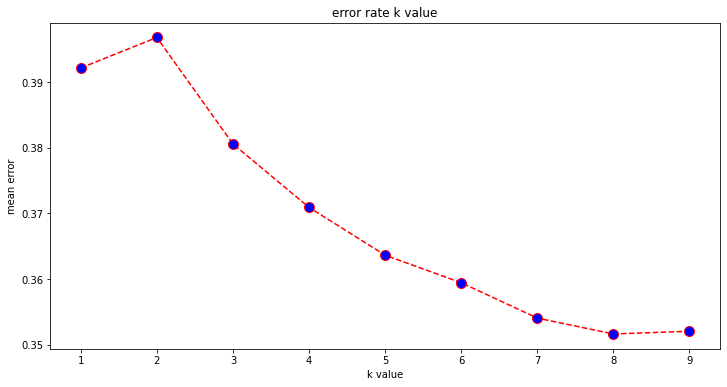

In [ ]:
# plot the error values against k values
plt.figure(figsize=(12,6))
plt.plot(range(1,10), error, color = 'red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('error rate k value')
plt.xlabel('k value')
plt.ylabel('mean error')

In [ ]:
# logistic regression training and prediction
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=100.0, solver='lbfgs', multi_class='multinomial')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[17494  8404     1]
 [ 8000 23845    21]
 [  427  4172    28]]
              precision    recall  f1-score   support

           1       0.67      0.68      0.68     25899
           2       0.65      0.75      0.70     31866
           3       0.56      0.01      0.01      4627

    accuracy                           0.66     62392
   macro avg       0.63      0.48      0.46     62392
weighted avg       0.66      0.66      0.64     62392



In [ ]:
# # SVM algorithm
# from sklearn.svm import SVC
# svm = SVC(kernel='rbf', gamma=10, C=10.0)
# svm.fit(x_train, y_train)
# y_pred = svm.predict(x_test)

# # evaluating the algorithm
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# Random tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=10,
    random_state=1)
tree_model.fit(x_train, y_train)
y_pred = tree_model.predict(x_test)
y_pred_proba = tree_model.predict_proba(x_test)

# tree.plot_tree(tree_model)
# plt.show()

# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16727  9144    28]
 [ 6601 25047   218]
 [  275  4106   246]]
              precision    recall  f1-score   support

           1       0.71      0.65      0.68     25899
           2       0.65      0.79      0.71     31866
           3       0.50      0.05      0.10      4627

    accuracy                           0.67     62392
   macro avg       0.62      0.50      0.50     62392
weighted avg       0.67      0.67      0.65     62392



In [ ]:
# BaggingClassifier algorithm
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    random_state=1
)

bag = BaggingClassifier(
    base_estimator=tree,
    n_estimators=10,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=1,
    random_state=1
    )

bag = bag.fit(x_train,y_train)
y_pred = bag.predict(x_test)

# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18594  7157   148]
 [ 7989 22989   888]
 [  479  3370   778]]
              precision    recall  f1-score   support

           1       0.69      0.72      0.70     25899
           2       0.69      0.72      0.70     31866
           3       0.43      0.17      0.24      4627

    accuracy                           0.68     62392
   macro avg       0.60      0.54      0.55     62392
weighted avg       0.67      0.68      0.67     62392



In [ ]:
#Random forests
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    criterion='entropy',
    n_estimators=100,
    max_samples=None,
    max_features=0.28, # defalut value equals to sqrt(m)
    random_state=1,
    n_jobs=2
)

forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)

# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18205  7640    54]
 [ 6168 25135   563]
 [  269  3666   692]]
              precision    recall  f1-score   support

           1       0.74      0.70      0.72     25899
           2       0.69      0.79      0.74     31866
           3       0.53      0.15      0.23      4627

    accuracy                           0.71     62392
   macro avg       0.65      0.55      0.56     62392
weighted avg       0.70      0.71      0.69     62392



In [ ]:
#AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=1,
    random_state=1
)

ada = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=1,
    random_state=1
)

ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)


# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[16520  9366    13]
 [ 6673 25029   164]
 [  251  4209   167]]
              precision    recall  f1-score   support

           1       0.70      0.64      0.67     25899
           2       0.65      0.79      0.71     31866
           3       0.49      0.04      0.07      4627

    accuracy                           0.67     62392
   macro avg       0.61      0.49      0.48     62392
weighted avg       0.66      0.67      0.65     62392



In [ ]:
# MLP algorithm
from sklearn import neural_network

mlp = neural_network.MLPClassifier(
    hidden_layer_sizes=(10),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    max_iter=200,
    tol=1e-4)

mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)

# evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[15931  9950    18]
 [ 5809 25940   117]
 [  210  4281   136]]
              precision    recall  f1-score   support

           1       0.73      0.62      0.67     25899
           2       0.65      0.81      0.72     31866
           3       0.50      0.03      0.06      4627

    accuracy                           0.67     62392
   macro avg       0.62      0.49      0.48     62392
weighted avg       0.67      0.67      0.65     62392

